# Projekt 1 - walidacja
Dane: **Bank Credit Evaluation**<br>

### Informacje o zbiorze danych
'id': Identification number. <br>
**'TARGET': Binary variable indicating if the individual had difficulty in repaying the credit (1 for difficulty, 0 for no difficulty).**<br>
'CNT_CHILDREN': Number of children the individual has.<br>
'AMT_INCOME_TOTAL': Total income of the individual.<br>
'AMT_CREDIT': Credit amount requested by the individual.<br>
'AMT_ANNUITY': Annuity of the loan.<br>
'AMT_GOODS_PRICE': Price of the goods for which the loan is given.<br>
'REGION_POPULATION_RELATIVE': Relative population of the region.<br>
'DAYS_BIRTH': Age of the individual in days (negative value).<br>
'DAYS_EMPLOYED': Number of days the individual has been employed (negative value).<br>
'DAYS_REGISTRATION': Number of days the individual's registration was made relative to the current application.<br>
'DAYS_ID_PUBLISH': Number of days since the individual published their ID.<br>
'FLAG_WORK_PHONE': Binary flag indicating if the individual has a work phone (1 for yes, 0 for no).<br>
'REGION_RATING_CLIENT': Region rating of the client.<br>
'HOUR_APPR_PROCESS_START': Hour of the day when the loan application process started.<br>

In [194]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

np.random.seed(52)

## Wczytanie danych

In [195]:
df = pd.read_csv('data.csv')
df.head()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,0,2,10
1,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573,-1827,0,3,9
2,100032,0,1,112500.0,327024.0,23827.5,270000.0,0.019101,-15948,-1234,-5782,-3153,0,2,10
3,100044,0,0,121500.0,454500.0,15151.5,454500.0,0.030755,-21077,-1288,-5474,-4270,0,2,10
4,100045,0,0,99000.0,247275.0,17338.5,225000.0,0.006207,-23920,365243,-9817,-4969,0,2,11


### Podzielenie zbioru danych na zbior treningowy i walidacyjny

In [196]:
y = np.array(df['TARGET'])
X = df.drop(['TARGET'],axis=1)

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=52
)


Przypisanie zbiorów X_val i y_val do X_train i y_train, aby wywołanie było identyczne dla grupy walidacyjnej

In [199]:
X_train.shape[0]


4000

Połączenie zbiorów X i y spowrotem w celu usuwania niepotrzebnych wierszy

In [200]:
y_train1 = pd.DataFrame({'Target': y_train})
X_train.index = y_train1.index
df_train = pd.concat([X_train, y_train1], axis=1)

df_train


,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target
0,151205,0,112500.0,521280.0,35392.5,450000.0,0.010147,-13286,-176,-2005,-4132,0,2,12,0
1,145689,1,126000.0,1256400.0,36864.0,900000.0,0.022800,-9657,-1856,-1306,-614,0,2,12,0
2,143533,1,171000.0,900000.0,43299.0,900000.0,0.020713,-11425,-3463,-3383,-4011,0,3,11,0
3,143005,0,144000.0,601470.0,30708.0,450000.0,0.004960,-9232,-473,-2914,-1834,0,2,12,0
4,143623,1,103500.0,566055.0,16353.0,472500.0,0.031329,-16098,-446,-2449,-4012,0,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,133141,0,225000.0,1206000.0,31941.0,1206000.0,0.028663,-20904,-1137,-3488,-3871,0,2,16,0
3996,145850,2,180000.0,270000.0,13500.0,270000.0,0.005313,-12812,-1501,-4026,-5324,0,2,13,0
3997,148232,0,234000.0,792162.0,43101.0,630000.0,0.016612,-14944,-1858,-8752,-4523,0,2,12,0
3998,142888,1,193500.0,450000.0,17095.5,450000.0,0.072508,-15605,-1446,-8285,-4360,0,1,18,0


In [201]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          4000 non-null   int64  
 1   CNT_CHILDREN                4000 non-null   int64  
 2   AMT_INCOME_TOTAL            4000 non-null   float64
 3   AMT_CREDIT                  4000 non-null   float64
 4   AMT_ANNUITY                 4000 non-null   float64
 5   AMT_GOODS_PRICE             3997 non-null   float64
 6   REGION_POPULATION_RELATIVE  4000 non-null   float64
 7   DAYS_BIRTH                  4000 non-null   int64  
 8   DAYS_EMPLOYED               4000 non-null   int64  
 9   DAYS_REGISTRATION           4000 non-null   int64  
 10  DAYS_ID_PUBLISH             4000 non-null   int64  
 11  FLAG_WORK_PHONE             4000 non-null   int64  
 12  REGION_RATING_CLIENT        4000 non-null   int64  
 13  HOUR_APPR_PROCESS_START     4000 

## Dostosowanie danych do pracy

In [202]:
#3 nulle w kolumnie goods_price
df_train.loc[df_train["AMT_GOODS_PRICE"].isnull()]
#czy usunąc? tylko jedna miała target 1

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target
318,109190,0,121500.0,270000.0,13500.0,NaN,0.006296,-12390,-640,-6365,-3597,0,3,16,1
323,145435,0,225000.0,382500.0,19125.0,NaN,0.010006,-17922,-1411,-652,-1445,1,2,9,0
565,130692,0,135000.0,495000.0,24750.0,NaN,0.020713,-22009,365243,-342,-1397,0,3,6,0


In [203]:
df_train = df_train.dropna(subset=['AMT_GOODS_PRICE'])
df_train.shape[0]

3997

In [204]:
# zmiena ujemnych wartosci w kolumnach DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH na nieujemne
# DAYS_EMPLOYED zajmiemy się niżej

df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'] * (-1)
df_train['DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'] * (-1)
df_train['DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'] * (-1)
df_train.head()

/var/folders/3z/lljdpnns22b_zsxsy4kc5khc0000gn/T/ipykernel_68342/969681780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'] * (-1)
/var/folders/3z/lljdpnns22b_zsxsy4kc5khc0000gn/T/ipykernel_68342/969681780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'] * (-1)
/var/folders/3z/lljdpnns22b_zsxsy4kc5khc0000gn/T/ipykernel_68342/969681780.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target
0,151205,0,112500.0,521280.0,35392.5,450000.0,0.010147,13286,-176,2005,4132,0,2,12,0
1,145689,1,126000.0,1256400.0,36864.0,900000.0,0.022800,9657,-1856,1306,614,0,2,12,0
2,143533,1,171000.0,900000.0,43299.0,900000.0,0.020713,11425,-3463,3383,4011,0,3,11,0
3,143005,0,144000.0,601470.0,30708.0,450000.0,0.004960,9232,-473,2914,1834,0,2,12,0
4,143623,1,103500.0,566055.0,16353.0,472500.0,0.031329,16098,-446,2449,4012,0,2,8,0


In [205]:
#DAYS_EMPLOYED - kolumna z ujemnymi wartosciami reprezentujacymi liczbe zatrudnionych dni przed złożeniem wniosku, 
# dodatnie wartości 365243 w kilku tysiacach rekordów  - ZAKLADAMY ZE SA TO OSOBY NIEZZATRUDNIONE a liczba 365243 nie ma znaczenia (okolo 80 lat)
# reformacja danych -> USTAWIENIE DAYS_EMPLOYED na wartosci dodatnie dla osob zatrudnionych, 0 dla osób niezatrudnionych
#df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'] * (-1)
df_train.loc[df_train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].multiply(-1)

/var/folders/3z/lljdpnns22b_zsxsy4kc5khc0000gn/T/ipykernel_68342/81714680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].multiply(-1)


In [206]:
df_train.loc[df_train["DAYS_EMPLOYED"] != 0]

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target
0,151205,0,112500.0,521280.0,35392.5,450000.0,0.010147,13286,176,2005,4132,0,2,12,0
1,145689,1,126000.0,1256400.0,36864.0,900000.0,0.022800,9657,1856,1306,614,0,2,12,0
2,143533,1,171000.0,900000.0,43299.0,900000.0,0.020713,11425,3463,3383,4011,0,3,11,0
3,143005,0,144000.0,601470.0,30708.0,450000.0,0.004960,9232,473,2914,1834,0,2,12,0
4,143623,1,103500.0,566055.0,16353.0,472500.0,0.031329,16098,446,2449,4012,0,2,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,133141,0,225000.0,1206000.0,31941.0,1206000.0,0.028663,20904,1137,3488,3871,0,2,16,0
3996,145850,2,180000.0,270000.0,13500.0,270000.0,0.005313,12812,1501,4026,5324,0,2,13,0
3997,148232,0,234000.0,792162.0,43101.0,630000.0,0.016612,14944,1858,8752,4523,0,2,12,0
3998,142888,1,193500.0,450000.0,17095.5,450000.0,0.072508,15605,1446,8285,4360,0,1,18,0


In [207]:
#jakie jest zbalansowanie probki
df_train['Target'].value_counts()

0    3282
1     715
Name: Target, dtype: int64

In [208]:
df_train.loc[df_train['Target']==1].shape[0] / df_train.shape[0]

#niezbalansowane dane - tylko okolo 18 procent ma wartosc 1 w Target

0.17888416312234176

In [209]:
df_train.loc[df_train["DAYS_EMPLOYED"] == 0].shape[0]

715

### Rozklady Zmiennych i korelacje z kolumną Target

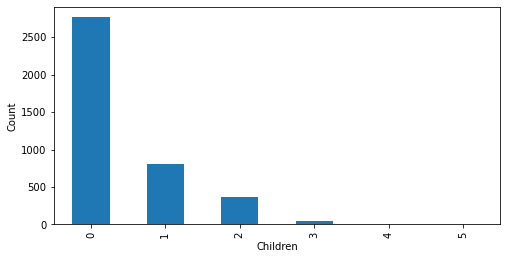

In [210]:
df_train["CNT_CHILDREN"].value_counts().plot(kind='bar', figsize=(8, 4))
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

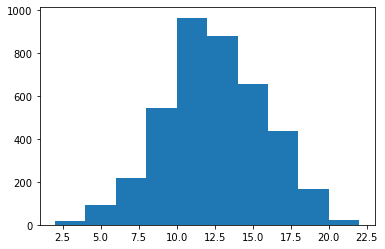

In [211]:
plt.hist(df_train["HOUR_APPR_PROCESS_START"]) 
plt.show()

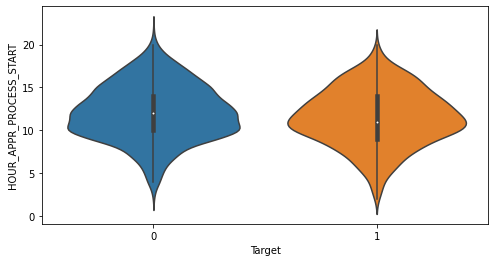

In [212]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "HOUR_APPR_PROCESS_START")
plt.show()

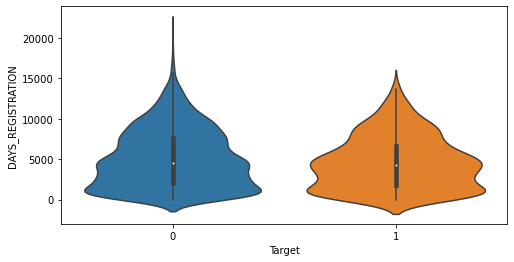

In [213]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "DAYS_REGISTRATION")
plt.show()

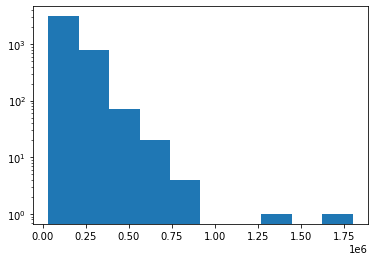

In [214]:
plt.hist(df_train["AMT_INCOME_TOTAL"], log = True) #skala logarytmiczna
plt.show()

Wyrzucenie wszystkich rekordów z wartościami kolumny 'AMT_INCOME_TOTAL' poza zakresem od pierwszego do 99 percentylu, ponieważ wyżej widać, że mamy kilka outlierów.

In [215]:
income_data = df_train['AMT_INCOME_TOTAL']
print('Wejściowy rozmiar: ', income_data.shape[0])

upper_lim = income_data.quantile(.99)
lower_lim = income_data.quantile(.01)

df_train_filtered = df_train[(df_train['AMT_INCOME_TOTAL'] >= lower_lim) & (df_train['AMT_INCOME_TOTAL'] <= upper_lim)]
print('Wyjściowy rozmiar: ', df_train_filtered.shape[0])
print('Pozostawiono [%]: ', round(df_train_filtered.shape[0]/income_data.shape[0], 2))

Wejściowy rozmiar:  3997
Wyjściowy rozmiar:  3938
Pozostawiono [%]:  0.99


In [216]:
df_train = df_train_filtered

In [217]:
df_train_filtered.loc[df_train_filtered["AMT_INCOME_TOTAL"] > 430000]

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target
421,146038,0,450000.0,2156400.0,59431.5,1800000.0,0.046220,11595,284,5983,3185,0,1,11,0
571,147436,0,441000.0,900000.0,48825.0,900000.0,0.020713,15668,7575,3189,4532,1,3,10,0
790,146925,0,450000.0,1729615.5,54306.0,1579500.0,0.046220,16244,5591,8661,3999,1,1,14,0
865,137926,1,450000.0,961146.0,28233.0,688500.0,0.003122,14315,3287,5748,3760,0,3,15,1
922,127217,0,450000.0,180000.0,9000.0,180000.0,0.005002,12583,1347,4623,4070,1,3,12,0
941,133408,0,450000.0,545040.0,26509.5,450000.0,0.031329,11961,269,6031,1084,1,2,10,1
974,111416,0,450000.0,770292.0,39460.5,688500.0,0.046220,15960,3574,23,4462,0,1,16,0
1077,146244,0,450000.0,2059056.0,71703.0,1777500.0,0.006305,11001,2023,5130,3676,0,3,13,0
1104,131431,0,450000.0,1762110.0,48586.5,1575000.0,0.009657,19103,7423,2548,2653,0,2,12,0
1122,141207,0,450000.0,1327500.0,49194.0,1327500.0,0.072508,21157,1205,150,4623,1,1,9,0


Jak widać pozbyliśmy się ich.

Dalsze sprawdzanie zależności w danych.

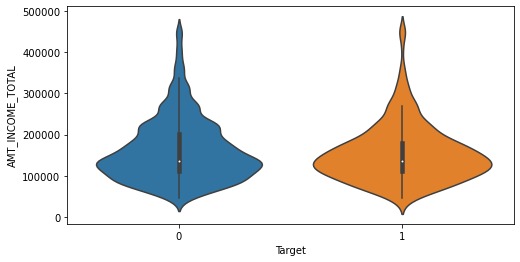

In [218]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "AMT_INCOME_TOTAL")
plt.show()

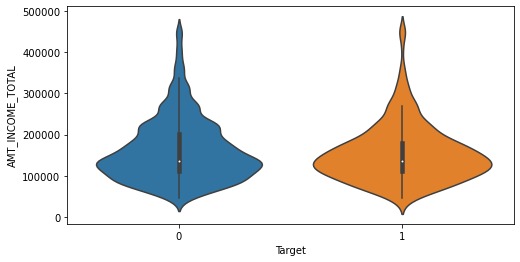

In [219]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train.loc[df_train["AMT_INCOME_TOTAL"]<500000], x = "Target", y = "AMT_INCOME_TOTAL")
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_ANNUITY'>

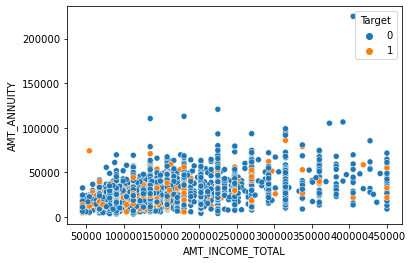

In [220]:
sns.scatterplot(data = df_train, x = "AMT_INCOME_TOTAL", y = "AMT_ANNUITY", hue = "Target")

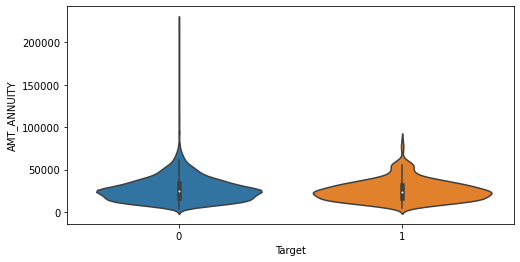

In [221]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "AMT_ANNUITY")
plt.show()

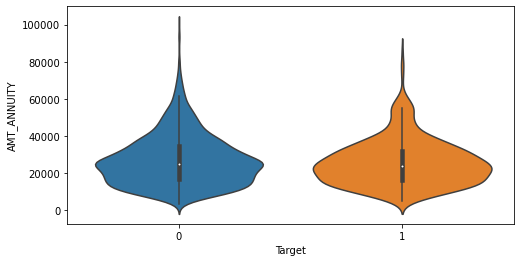

In [222]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train.loc[df_train["AMT_ANNUITY"]< 100000], x = "Target", y = "AMT_ANNUITY")
plt.show()

In [223]:
df_train["YEARS_OLD"] = df_train["DAYS_BIRTH"]/365

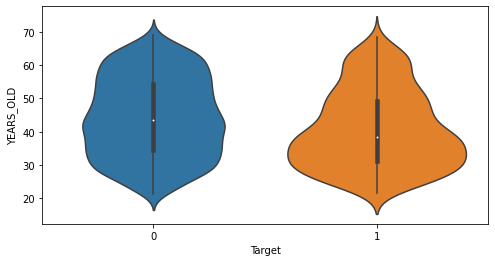

In [224]:

plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "YEARS_OLD")
plt.show()

Spora zależność wieku z Target=1

Stworzenie nowej kolumny CREDIT_TO_INCOME, która reprezentuje stosunek AMT_CREDIT do AMT_INCOME_TOTAL

In [225]:
df_train["CREDIT_TO_INCOME"] = df_train["AMT_CREDIT"]/df_train["AMT_INCOME_TOTAL"]

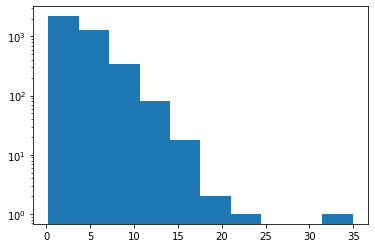

In [226]:
plt.hist(df_train["CREDIT_TO_INCOME"], log = True) #skala logarytmiczna
plt.show()

Znowu widać, że mamy outliery.

In [227]:
#znajdzmy outlierów - CREDIT_TO_INCOME > 40
#wyrzucamy ich
#df_train.loc[df_train["CREDIT_TO_INCOME"] > 40]
df_train = df_train[df_train["CREDIT_TO_INCOME"] < 30]
df_train.shape[0]


3937

<AxesSubplot:xlabel='CREDIT_TO_INCOME', ylabel='YEARS_OLD'>

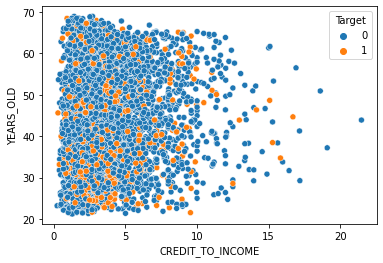

In [228]:
sns.scatterplot(data = df_train, x = "CREDIT_TO_INCOME", y = "YEARS_OLD", hue = "Target")

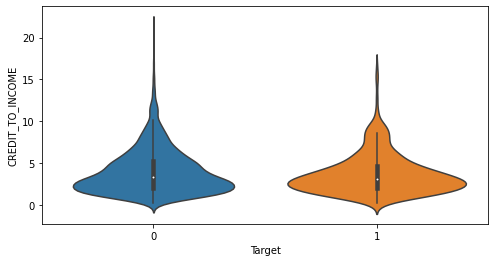

In [229]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "CREDIT_TO_INCOME")
plt.show()

Stworzenie nowej kolumny ANNUITY_TO_INCOME, która przedstawia stosunek AMT_ANNUITY do AMT_INCOME_TOTAL

In [230]:
df_train["ANNUITY_TO_INCOME"] = df_train["AMT_ANNUITY"]/df_train["AMT_INCOME_TOTAL"]

/var/folders/3z/lljdpnns22b_zsxsy4kc5khc0000gn/T/ipykernel_68342/4149140757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["ANNUITY_TO_INCOME"] = df_train["AMT_ANNUITY"]/df_train["AMT_INCOME_TOTAL"]


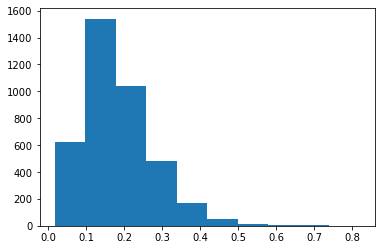

In [231]:

plt.hist(df_train["ANNUITY_TO_INCOME"])
plt.show()

Usunięcie osób, rekordów gdzie osoby przeznaczały zbyt duży procent swoich rocznych przychodów na kredyt (a dalej nie mieli problemu z jego spłaceniem)

In [232]:
df_train = df_train[df_train["ANNUITY_TO_INCOME"] < 0.8]
df_train.shape[0]

3936

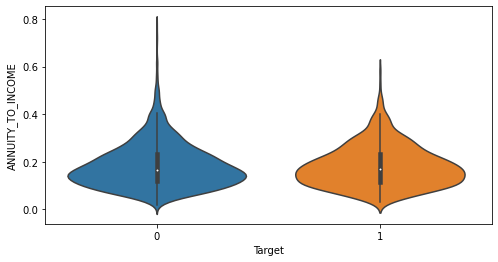

In [233]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "ANNUITY_TO_INCOME")
plt.show()

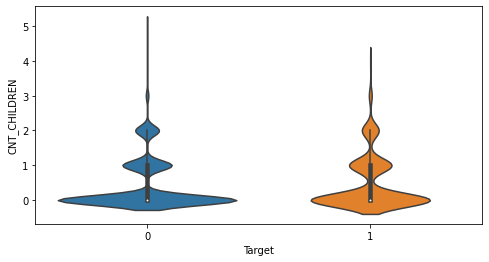

In [234]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "CNT_CHILDREN")
plt.show()

<AxesSubplot:xlabel='ANNUITY_TO_INCOME', ylabel='CNT_CHILDREN'>

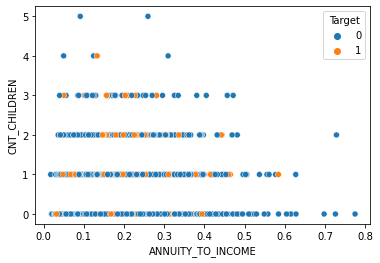

In [235]:
sns.scatterplot(data = df_train, x = "ANNUITY_TO_INCOME", y = "CNT_CHILDREN", hue = "Target")

In [236]:
df_train.loc[df_train["CNT_CHILDREN"] > 4]

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target,YEARS_OLD,CREDIT_TO_INCOME,ANNUITY_TO_INCOME
508,143899,5,265500.0,824823.0,24246.0,688500.0,0.006629,19946,13285,10387,3029,0,2,11,0,54.646575,3.106678,0.091322
3431,125484,5,67500.0,284400.0,17527.5,225000.0,0.020246,12911,1801,444,5129,0,3,11,0,35.372603,4.213333,0.259667


Wyrzucenie osób mających więcej niż 4 dzieci

In [237]:
df_train = df_train[df_train["CNT_CHILDREN"] < 5]
df_train.shape[0]

3934

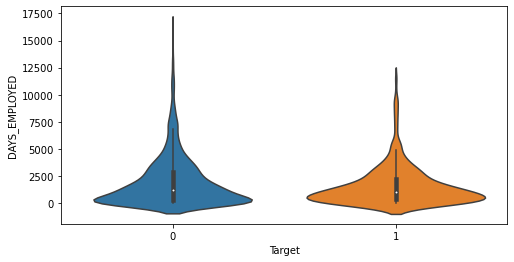

In [238]:
plt.figure(figsize=(8, 4))
sns.violinplot(data = df_train, x = "Target", y = "DAYS_EMPLOYED")
plt.show()


## Usuwanie niepotrzebnych kolumn
FLAG_WORK_PHONE, HOUR_APPR_PROCESS_START, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_REGISTRATION, DAYS_ID_PUBLISH, REGION_RATING_CLIENT

Uznaliśmy, że ich korelacje z kolumną target są zbyt małe aby je użyć w modelowaniu (albo nie mamy pojęcia co oznaczają np. REGION_POPULATION_RELATIVE)

In [239]:
df_train

,id,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,Target,YEARS_OLD,CREDIT_TO_INCOME,ANNUITY_TO_INCOME
0,151205,0,112500.0,521280.0,35392.5,450000.0,0.010147,13286,176,2005,4132,0,2,12,0,36.400000,4.633600,0.314600
1,145689,1,126000.0,1256400.0,36864.0,900000.0,0.022800,9657,1856,1306,614,0,2,12,0,26.457534,9.971429,0.292571
2,143533,1,171000.0,900000.0,43299.0,900000.0,0.020713,11425,3463,3383,4011,0,3,11,0,31.301370,5.263158,0.253211
3,143005,0,144000.0,601470.0,30708.0,450000.0,0.004960,9232,473,2914,1834,0,2,12,0,25.293151,4.176875,0.213250
4,143623,1,103500.0,566055.0,16353.0,472500.0,0.031329,16098,446,2449,4012,0,2,8,0,44.104110,5.469130,0.158000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,133141,0,225000.0,1206000.0,31941.0,1206000.0,0.028663,20904,1137,3488,3871,0,2,16,0,57.271233,5.360000,0.141960
3996,145850,2,180000.0,270000.0,13500.0,270000.0,0.005313,12812,1501,4026,5324,0,2,13,0,35.101370,1.500000,0.075000
3997,148232,0,234000.0,792162.0,43101.0,630000.0,0.016612,14944,1858,8752,4523,0,2,12,0,40.942466,3.385308,0.184192
3998,142888,1,193500.0,450000.0,17095.5,450000.0,0.072508,15605,1446,8285,4360,0,1,18,0,42.753425,2.325581,0.088349


In [240]:
df_train = df_train.drop(columns=[ 'FLAG_WORK_PHONE', 'HOUR_APPR_PROCESS_START','DAYS_BIRTH','id'])

In [241]:
df_train = df_train.drop(columns=['REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','REGION_RATING_CLIENT'])

### NORMALIZACJA DANYCH - konieczna do niektórych modeli

In [242]:
from sklearn.preprocessing import MinMaxScaler #scaler normalizujacy dane
scaler = MinMaxScaler()

for column in df_train.columns:
        # Skalowanie danych dla danej kolumny
        if column!= 'CREDIT_TO_INCOME' and column != "ANNUITY_TO_INCOME":
            df_train[column] = scaler.fit_transform(df_train[[column]])

In [243]:
df_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Target,YEARS_OLD,CREDIT_TO_INCOME,ANNUITY_TO_INCOME
0,0.00,0.166667,0.192647,0.144363,0.183673,0.010788,0.0,0.317829,4.633600,0.314600
1,0.25,0.200000,0.489989,0.151003,0.387755,0.113767,0.0,0.109446,9.971429,0.292571
2,0.25,0.311111,0.345832,0.180042,0.387755,0.212272,0.0,0.210968,5.263158,0.253211
3,0.00,0.244444,0.225082,0.123223,0.183673,0.028994,0.0,0.085042,4.176875,0.213250
4,0.25,0.144444,0.210757,0.058444,0.193878,0.027338,0.0,0.479299,5.469130,0.158000
...,...,...,...,...,...,...,...,...,...,...
3995,0.00,0.444444,0.469603,0.128787,0.526531,0.069695,0.0,0.755268,5.360000,0.141960
3996,0.50,0.333333,0.091008,0.045569,0.102041,0.092007,0.0,0.290612,1.500000,0.075000
3997,0.00,0.466667,0.302213,0.179149,0.265306,0.113890,0.0,0.413035,3.385308,0.184192
3998,0.25,0.366667,0.163815,0.061794,0.183673,0.088636,0.0,0.450991,2.325581,0.088349


# Wstępne modelowanie danych + podział danych na treningowe i testowe

In [244]:
y = np.array(df_train['Target'])
X = df_train.drop(['Target'],axis=1)

In [245]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CNT_CHILDREN       3934 non-null   float64
 1   AMT_INCOME_TOTAL   3934 non-null   float64
 2   AMT_CREDIT         3934 non-null   float64
 3   AMT_ANNUITY        3934 non-null   float64
 4   AMT_GOODS_PRICE    3934 non-null   float64
 5   DAYS_EMPLOYED      3934 non-null   float64
 6   Target             3934 non-null   float64
 7   YEARS_OLD          3934 non-null   float64
 8   CREDIT_TO_INCOME   3934 non-null   float64
 9   ANNUITY_TO_INCOME  3934 non-null   float64
dtypes: float64(10)
memory usage: 338.1 KB


### Podzial na dane testowe i trenignowe

Ponowny podział danych walidacyjnych na zbiory treningowy i testowy

In [246]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=52
)

In [247]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3147 entries, 3746 to 3895
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CNT_CHILDREN       3147 non-null   float64
 1   AMT_INCOME_TOTAL   3147 non-null   float64
 2   AMT_CREDIT         3147 non-null   float64
 3   AMT_ANNUITY        3147 non-null   float64
 4   AMT_GOODS_PRICE    3147 non-null   float64
 5   DAYS_EMPLOYED      3147 non-null   float64
 6   YEARS_OLD          3147 non-null   float64
 7   CREDIT_TO_INCOME   3147 non-null   float64
 8   ANNUITY_TO_INCOME  3147 non-null   float64
dtypes: float64(9)
memory usage: 245.9 KB


In [379]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 1071 to 2197
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CNT_CHILDREN       787 non-null    float64
 1   AMT_INCOME_TOTAL   787 non-null    float64
 2   AMT_CREDIT         787 non-null    float64
 3   AMT_ANNUITY        787 non-null    float64
 4   AMT_GOODS_PRICE    787 non-null    float64
 5   DAYS_EMPLOYED      787 non-null    float64
 6   YEARS_OLD          787 non-null    float64
 7   CREDIT_TO_INCOME   787 non-null    float64
 8   ANNUITY_TO_INCOME  787 non-null    float64
dtypes: float64(9)
memory usage: 61.5 KB


### Base-line'owe modelowanie

In [248]:
from sklearn.dummy import DummyClassifier

## Metryki
Ze względu na bardzo niezbalansowaną próbkę metryka **accuracy nie miała by na naszych danych zbyt wiele sensu**.</br>
(jesli 80% próbki na klasę 0 to accuracy wyznaczenia klasy 0 dla kazdego rekordu byłaby nieprawdziwie wysoka)


In [249]:
 from sklearn.metrics import recall_score, accuracy_score, precision_score


In [250]:
#losowanie jednostajne
dc = DummyClassifier(strategy='most_frequent', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

In [251]:
accuracy_score(y_test, y_hat)

0.8221092757306226

In [252]:
recall_score(y_test, y_hat)

0.0

In [253]:
#losowanie jednostajne
dc = DummyClassifier(strategy='stratified', random_state=42)
dc.fit(X_train,y_train)
y_proba = dc.predict_proba(X_test)
y_hat = dc.predict(X_test)

In [254]:
accuracy_score(y_test, y_hat)

0.7064803049555273

In [255]:
precision_score(y_test, y_hat)

0.17266187050359713

In [256]:
recall_score(y_test, y_hat)

0.17142857142857143

Testowanie drzew decyzyjnych

In [380]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 

tree1 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10)
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)

In [381]:
accuracy_score(y_test, y_hat)

0.820838627700127

In [382]:
recall_score(y_test, y_hat)

0.0

In [383]:
precision_score(y_test, y_hat)

0.0

Często bedziemy sprawdzać czy zbalansowanie wyników jakkolwiek odzwierciedla rzeczywiste zbalandowanie kolumny Target

In [384]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 786
Wartość: 1.0, Liczba wystąpień: 1


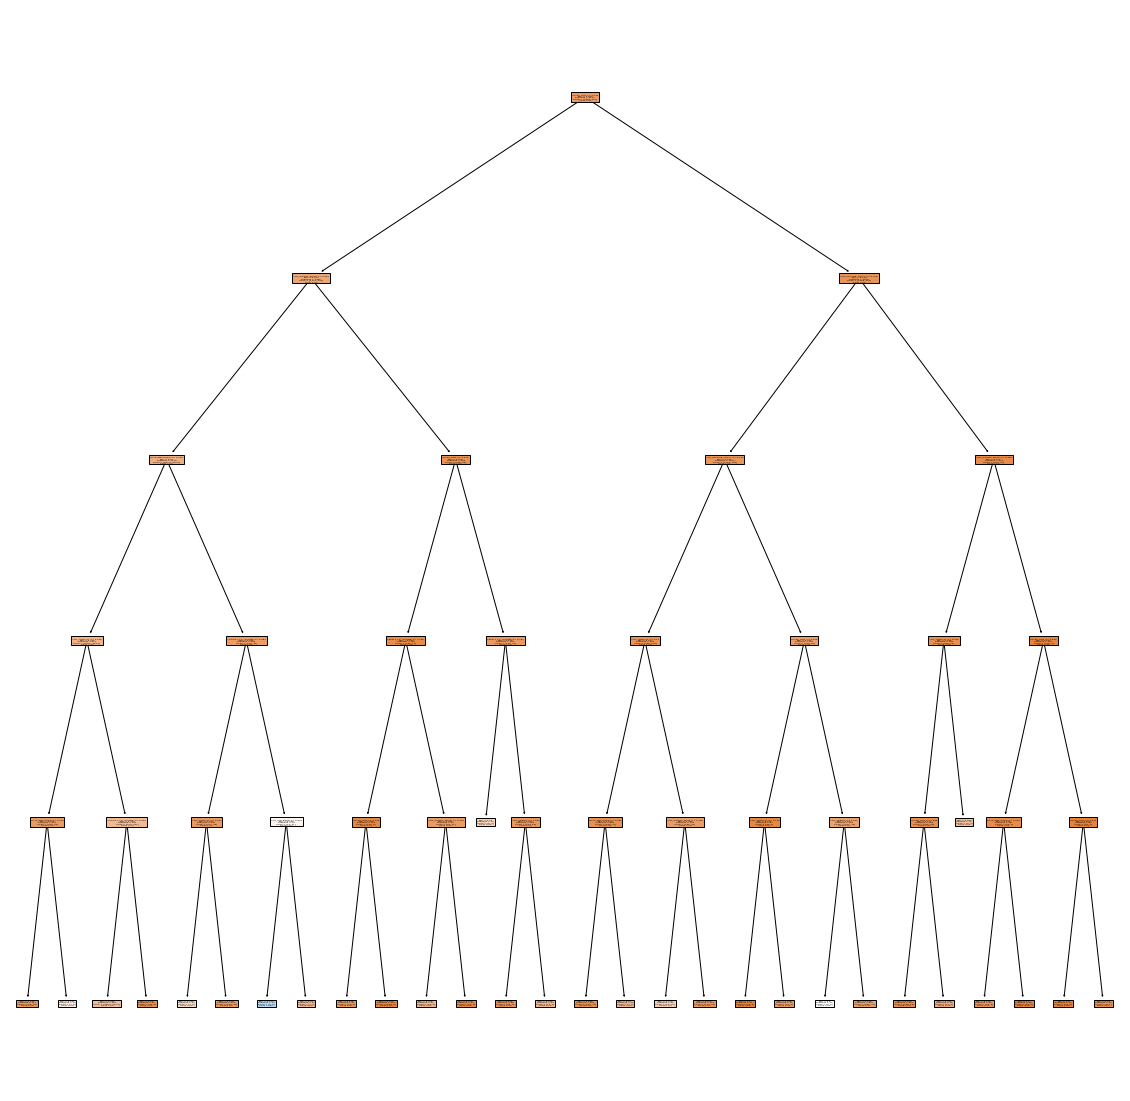

In [386]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

In [263]:
tree1 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, class_weight='balanced', random_state=42)
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)

In [264]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 488
Wartość: 1.0, Liczba wystąpień: 299


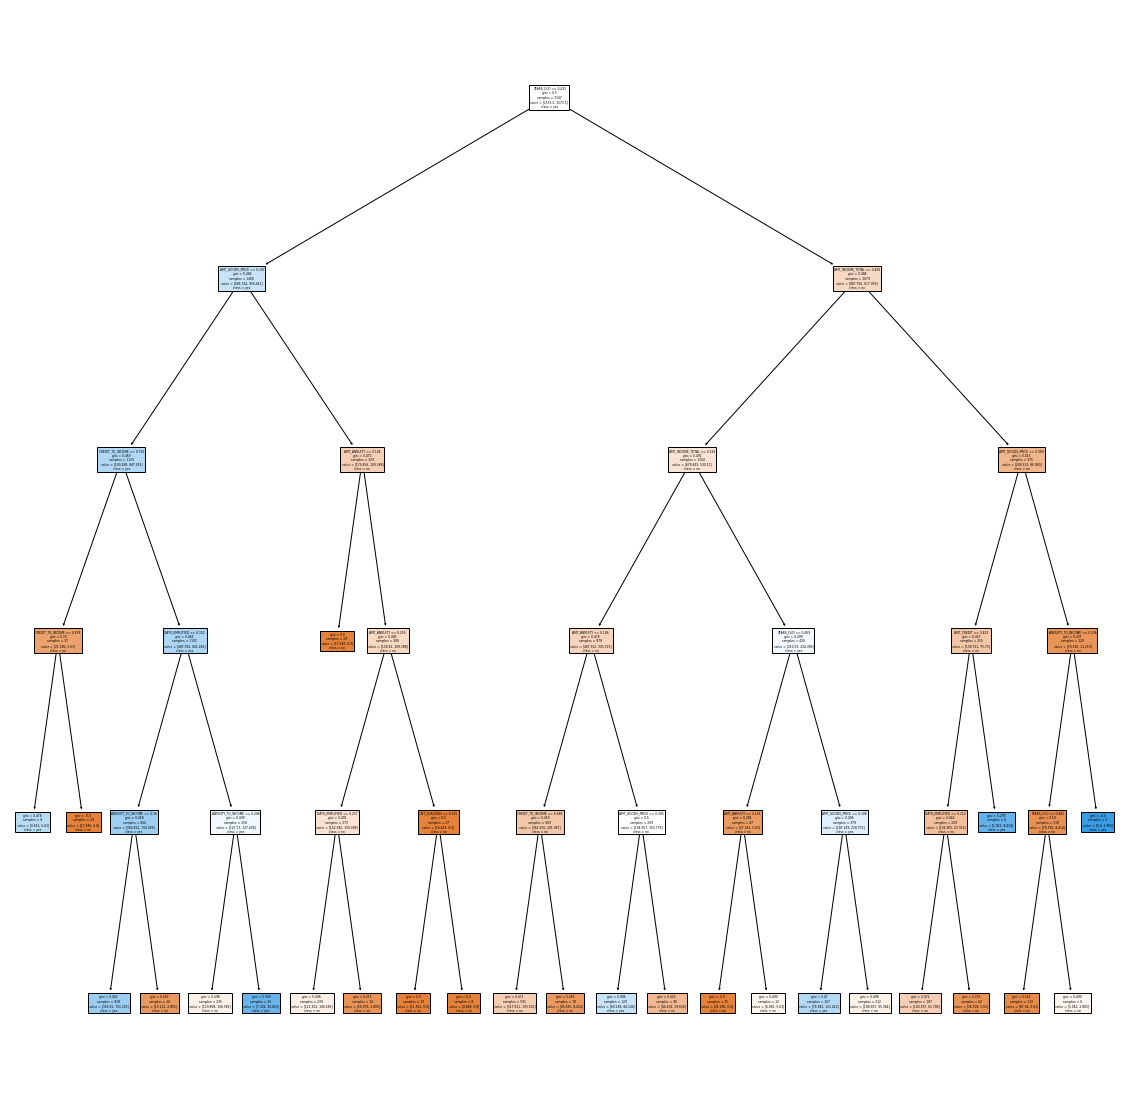

In [265]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

In [266]:
accuracy_score(y_test, y_hat)

0.5997458703939009

In [267]:
recall_score(y_test, y_hat)

0.44285714285714284

In [268]:
#jaki procent jedynek jest poprawnie przewidziany
precision_score(y_test, y_hat)

0.20735785953177258

Już lepsze wyniki od dummy classifier

In [269]:
tree1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_leaf = 5)
tree1.fit(X_train,y_train)

y_hat = tree1.predict(X_test)

In [270]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


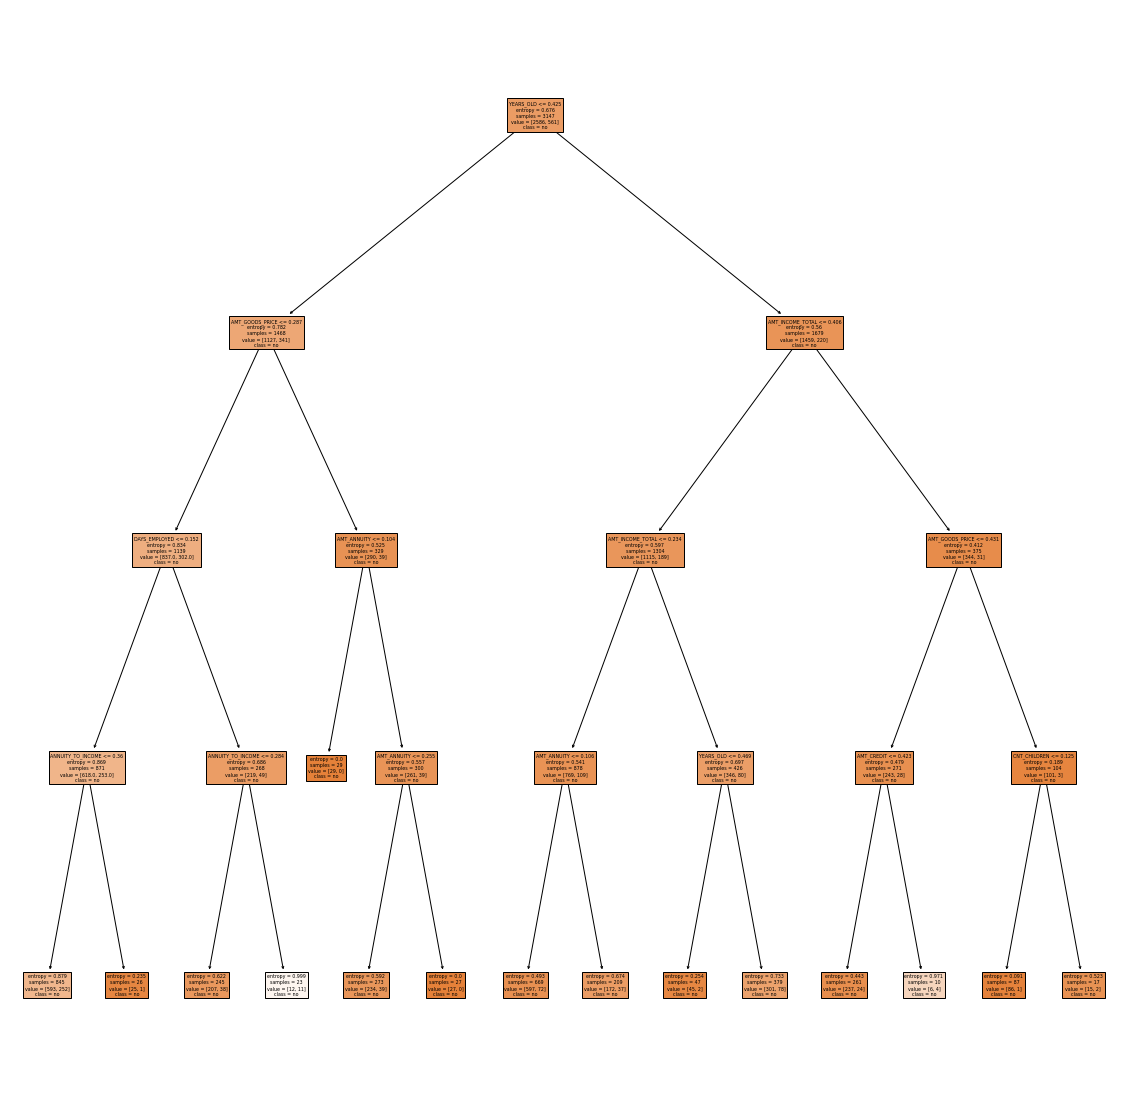

In [271]:
plt.figure(figsize=(20,20))
plot_tree(tree1, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()

In [272]:
recall_score(y_test, y_hat)

0.0

In [273]:
accuracy_score(y_test, y_hat)

0.8221092757306226

Testowanie regresji logistycznej

In [397]:
# regresa logistyczna 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, penalty = None)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:30]) + '\ny_hat: ' + str(y_test[0:30]))

y:     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
y_hat: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1.]


In [398]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


Przewiduje same 0 (parametr class_weight = 'balanced' bedzie testowany pozniej)

In [399]:
recall_score(y_test,y_hat)

0.0

In [400]:
lr.coef_

array([[  0.02457498,  -0.58919111,   7.82849664,   4.46414344,
        -10.3344958 ,  -1.33361693,  -1.21561922,   0.04684551,
         -1.60629438]])

In [401]:
precision_score(y_test, y_hat)

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [402]:
accuracy_score(y_test, y_hat)

0.8221092757306226

Testowanie KNeighbors Classifier

In [403]:
from sklearn.neighbors import KNeighborsClassifier ## NARAZIE NAJLEPSZY X D
lr = KNeighborsClassifier(n_neighbors=5)

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:30]) + '\ny_hat: ' + str(y_test[0:30]))

y:     [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
y_hat: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1.]


In [404]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 740
Wartość: 1.0, Liczba wystąpień: 47


In [405]:
precision_score(y_test, y_hat)

0.2765957446808511

In [406]:
recall_score(y_test, y_hat)

0.09285714285714286

In [407]:
accuracy_score(y_test,y_hat)

0.795425667090216

In [285]:
df_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Target,YEARS_OLD,CREDIT_TO_INCOME,ANNUITY_TO_INCOME
0,0.00,0.166667,0.192647,0.144363,0.183673,0.010788,0.0,0.317829,4.633600,0.314600
1,0.25,0.200000,0.489989,0.151003,0.387755,0.113767,0.0,0.109446,9.971429,0.292571
2,0.25,0.311111,0.345832,0.180042,0.387755,0.212272,0.0,0.210968,5.263158,0.253211
3,0.00,0.244444,0.225082,0.123223,0.183673,0.028994,0.0,0.085042,4.176875,0.213250
4,0.25,0.144444,0.210757,0.058444,0.193878,0.027338,0.0,0.479299,5.469130,0.158000


Testowanie Random Forest Classifier

In [408]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, # Liczba słabych estymatorów
                                  max_depth = 3, # Maksymalna wysokość drzewa w słabym estymatorze
                                  min_samples_split = 20, # Minimalna liczba obserwacji wymagana do podziału węzła
                                  max_features = 4, # Maksymalna liczba zmiennych brana pod uwagę przy podziale węzła
                                  random_state=42,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)
y_hat = model_rf.predict(X_test)


In [409]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


Znowu same 0 na pewno trzeba zastowsować class_weight = 'balanced'

In [410]:
precision_score(y_test, y_hat)

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [411]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=1, algorithm = "SAMME")
model.fit(X_train, y_train)
model.score(X_test,y_test)
y_hat = model.predict(X_test)


In [412]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


Tak samo...

In [291]:
precision_score(y_test, y_hat)

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [415]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, # Liczba słabych estymatorów
                                  max_depth = 5, # Maksymalna wysokość drzewa w słabym estymatorze
                                  min_samples_split = 40, # Minimalna liczba obserwacji wymagana do podziału węzła
                                  max_features = 2, # Maksymalna liczba zmiennych brana pod uwagę przy podziale węzła
                                  random_state=42,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
model_rf.score(X_test,y_test)
y_hat = model_rf.predict(X_test)

In [416]:
unique_values, counts = np.unique(y_hat, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


Tak samo...

In [421]:
recall_score(y_test,y_hat)

0.0

Wreszcie próbujemy ponownie wszystkie klasyfikatory z warunkiem z ewidentnie potrzebnym warunkiem class_weights: 

In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [423]:
lr=LogisticRegression(class_weight = 'balanced')
dt=DecisionTreeClassifier(class_weight = 'balanced')
rf=RandomForestClassifier(class_weight = 'balanced')
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [300]:
from sklearn.metrics import roc_auc_score,roc_curve, f1_score

Tworzymy funkcję, która pomoże nam oceniać klasyfikatory 

In [301]:
def predictor(model):    
    print("For the", type(model).__name__)    
    model.fit(X_train, y_train)    
    y_pred_test = model.predict(X_test)        
    print("The TEST accuracy is", accuracy_score(y_test, y_pred_test))    
    print("The ROC score for TEST data is", roc_auc_score(y_test, y_pred_test))    
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])    
    plt.plot(fpr, tpr)    
    plt.plot([0, 1], [0, 1], linestyle='--')    
    plt.xlabel('False Positive Rate')    
    plt.ylabel('True Positive Rate')    
    plt.title('ROC Curve')    
    plt.grid()    
    plt.show()

Test działania funkcji:

For the LogisticRegression
The TEST accuracy is 0.5641677255400254
The ROC score for TEST data is 0.5558180613822035


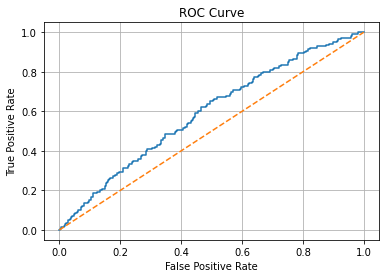

In [302]:
predictor(lr)

For the GaussianNB
The TEST accuracy is 0.7878017789072427
The ROC score for TEST data is 0.5295098255685582


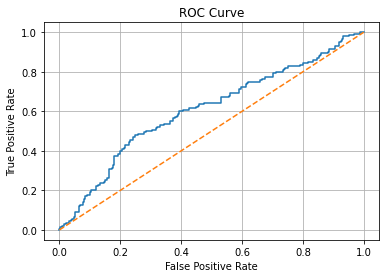

In [303]:
predictor(gnb)

For the DecisionTreeClassifier
The TEST accuracy is 0.7077509529860229
The ROC score for TEST data is 0.478024950320159


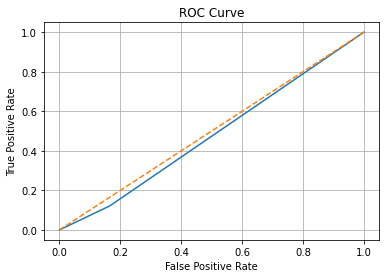

In [304]:
predictor(dt)

For the KNeighborsClassifier
The TEST accuracy is 0.795425667090216
The ROC score for TEST data is 0.5201534555089424


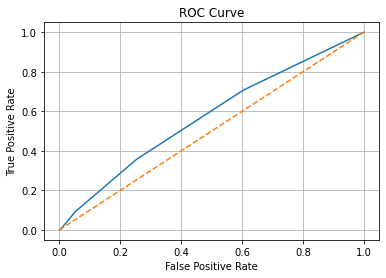

In [305]:
predictor(knn)

For the RandomForestClassifier
The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5139931552219034


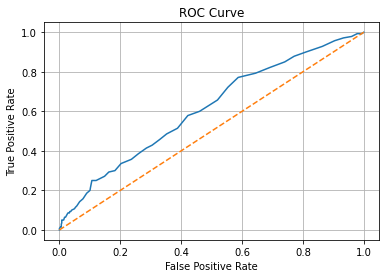

In [424]:
predictor(rf)

Testowanie dodatkowe XGBClassifier...

In [426]:
from xgboost import XGBClassifier 

model = XGBClassifier(
    random_state=1,
    n_estimators=200,  # Liczba drzew
    learning_rate=0.01,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=3,  # Maksymalna głębokość drzewa    
)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8221092757306226

In [427]:
recall_score(y_test,y_hat)

0.0

... Gradient Boosting Classifier ...

In [428]:
from sklearn.ensemble import GradientBoostingClassifier 

In [310]:
model1 = DecisionTreeClassifier(random_state=1, max_depth=3)
model2 = KNeighborsClassifier(n_neighbors=10) #predykcja klasy na podstawie najblizszych "sąsiadów" (obiektów o najbardziej zblizonyhc cechach)
model3 = LogisticRegression(max_iter=1000, penalty=None) 
model4 = XGBClassifier(random_state=1,
    n_estimators=200,  # Liczba drzew
    learning_rate=0.01,  # Szybkość "uczenia" się
    booster="gbtree",  # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
    max_depth=3,  # Maksymalna głębokość drzewa
                      )
model5 = GradientBoostingClassifier(
    random_state=1, learning_rate=0.01, max_depth=2, min_samples_split=20, min_samples_leaf=20)
                       
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3),('XGB', model4), ('Gradient', model5)] 

In [311]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    y_pred = estimator[1].predict(X_test)
    print(f'{estimator[0]} precision_score: {precision_score(y_test, y_pred)}')
    print(f'{estimator[0]} recall_score: {recall_score(y_test, y_pred)}')
    print(f'{estimator[0]} ROC_score: {roc_auc_score(y_test, y_pred)}')
    print(f'{estimator[0]} accuracy_score: {accuracy_score(y_test, y_pred)}')



DecisionTree precision_score: 0.0
DecisionTree recall_score: 0.0
DecisionTree ROC_score: 0.49845440494590415
DecisionTree accuracy_score: 0.8195679796696315
KNN precision_score: 0.18181818181818182
KNN recall_score: 0.014285714285714285
KNN ROC_score: 0.5001876793994259
KNN accuracy_score: 0.8132147395171537
LR precision_score: 0.0
LR recall_score: 0.0
LR ROC_score: 0.5
LR accuracy_score: 0.8221092757306226


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGB precision_score: 0.0
XGB recall_score: 0.0
XGB ROC_score: 0.5
XGB accuracy_score: 0.8221092757306226
Gradient precision_score: 0.0
Gradient recall_score: 0.0
Gradient ROC_score: 0.5
Gradient accuracy_score: 0.8221092757306226


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For the DecisionTreeClassifier
The TEST accuracy is 0.8195679796696315
The ROC score for TEST data is 0.49845440494590415


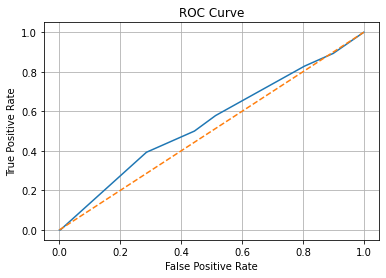

For the KNeighborsClassifier
The TEST accuracy is 0.8132147395171537
The ROC score for TEST data is 0.5001876793994259


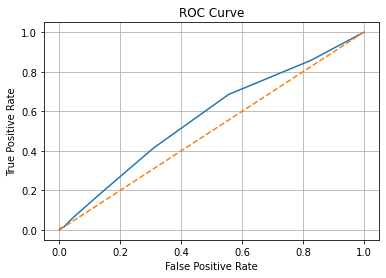

For the LogisticRegression
The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5


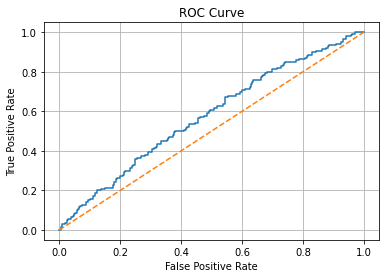

For the XGBClassifier
The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5


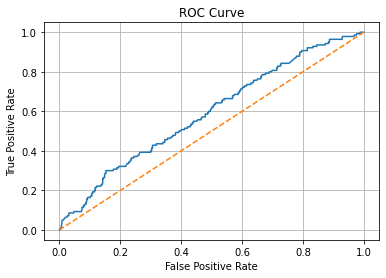

For the GradientBoostingClassifier
The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5


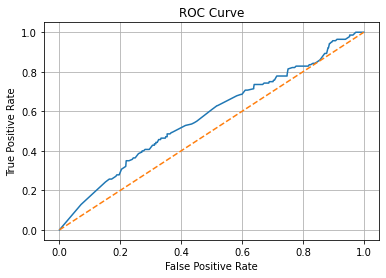

In [312]:
for estimator in estimators:
    predictor(estimator[1])

In [313]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    random_state=1, learning_rate=0.01, max_depth=2, min_samples_split=20, min_samples_leaf=20
)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8221092757306226

In [314]:
recall_score(y_test,y_hat)

0.0

Regresja logistyczna z argumentem, CLASS_WEIGHT


In [433]:
# regresa logistyczna z argumente, CLASS_WEIGHT
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=3000, class_weight = 'balanced')

lr.fit(X_train,y_train)
y_hat = lr.predict(X_test)
print('y:     ' + str(y_hat[0:20]) + '\ny_hat: ' + str(y_test[0:20]))

y:     [1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
y_hat: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]


In [434]:
recall_score(y_test,y_hat)

0.5428571428571428

In [435]:
precision_score(y_test,y_hat)

0.2140845070422535

In [436]:
f1_score(y_test,y_hat)

0.30707070707070705

In [437]:
accuracy_score(y_test, y_hat)

0.5641677255400254

Od razu lepsze wyniki!!!

Następnie testowanie RandomOverSampler

Działanie RandomOverSampler jest dość proste:

1. Losowo wybiera próbki z mniejszej klasy (klasy mniejszościowej).
2. Duplikuje wybrane próbki w celu zwiększenia liczby próbek klasy mniejszościowej do poziomu, który jest zbliżony do liczby próbek klasy większościowej.
3. Zwraca zbalansowany zbiór danych, w którym liczba próbek w każdej klasie jest równomierna.

In [321]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [439]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [440]:
# Zastosowanie RandomOverSampler do danych treningowych
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Trenowanie modelu KNN na zrównoważonych danych
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_resampled, y_resampled)

# Ocena modelu na zbiorze testowym
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       647
         1.0       0.22      0.53      0.31       140

    accuracy                           0.58       787
   macro avg       0.54      0.56      0.51       787
weighted avg       0.74      0.58      0.63       787



In [441]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

# Ocena modelu na zbiorze testowym
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       647
         1.0       0.18      0.01      0.03       140

    accuracy                           0.81       787
   macro avg       0.50      0.50      0.46       787
weighted avg       0.71      0.81      0.74       787



Test z SMOTE:

In [325]:
ros = SMOTE(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Utworzenie i trenowanie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=5)
tree.fit(X_resampled, y_resampled)

# Predykcja na zbiorze testowym
y_pred = tree.predict(X_test)

# Wydruk raportu klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.58      0.69       647
         1.0       0.21      0.53      0.30       140

    accuracy                           0.57       787
   macro avg       0.53      0.55      0.50       787
weighted avg       0.74      0.57      0.62       787



In [326]:
tree = DecisionTreeClassifier(class_weight='balanced', max_depth=5)
tree.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = tree.predict(X_test)

# Wydruk raportu klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.64      0.72       647
         1.0       0.21      0.44      0.28       140

    accuracy                           0.60       787
   macro avg       0.52      0.54      0.50       787
weighted avg       0.73      0.60      0.65       787



Całkiem ok

Inna strategia zbalansowania danych - adasyn:

In [442]:
from imblearn.over_sampling import ADASYN


adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Utworzenie i trenowanie modelu drzewa decyzyjnego
tree = model5
tree.fit(X_resampled, y_resampled)

# Predykcja na zbiorze testowym
y_pred = tree.predict(X_test)

# Wydruk raportu klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.36      0.51       647
         1.0       0.20      0.74      0.32       140

    accuracy                           0.43       787
   macro avg       0.53      0.55      0.41       787
weighted avg       0.75      0.43      0.48       787



Troche gorzej.

Tworzymy nową funkcjeę do sprawdzania wszystkich estymatorów z wektora na raz (za pomocą wcześniej stworzonej funkcji.

In [329]:
def check_estimators(estimators, X_train,y_train):
    for estimator in estimators:
        e = estimator[1]
        e.fit(X_train, y_train)
        y_pred = e.predict(X_test)
        print(estimator[0])
        print(classification_report(y_test, y_pred))

Wybranie kilku modelów, których wyniki były w miarę ok

In [444]:
model1 = DecisionTreeClassifier(random_state=1, max_depth=5,class_weight = 'balanced', min_samples_split=10)
model2 = KNeighborsClassifier(n_neighbors=5) #predykcja klasy na podstawie najblizszych "sąsiadów" (obiektów o najbardziej zblizonyhc cechach)
model3 = XGBClassifier(random_state=1,
    n_estimators=200,  
    learning_rate=0.01, 
    booster="gbtree",  
    max_depth=3,  
    )
model4 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model5 = GaussianNB()
model6 = LogisticRegression(max_iter=1000, penalty="l2", class_weight = 'balanced') 
#model5 = GradientBoostingClassifier(
 #   random_state=1, learning_rate=0.01, max_depth=2, min_samples_split=20, min_samples_leaf=20)
                       
estimators=[('DecisionTree', model1), ('KNN', model2), ('XGB',model3),('RF', model4),('NB', model5),('LR', model6)]

For the DecisionTreeClassifier
The TEST accuracy is 0.5997458703939009
The ROC score for TEST data is 0.5382755575182159


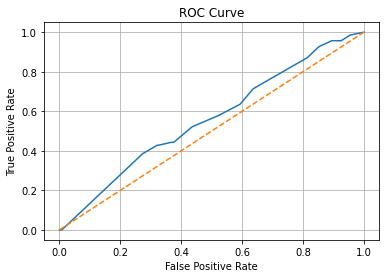

For the KNeighborsClassifier
The TEST accuracy is 0.795425667090216
The ROC score for TEST data is 0.5201534555089424


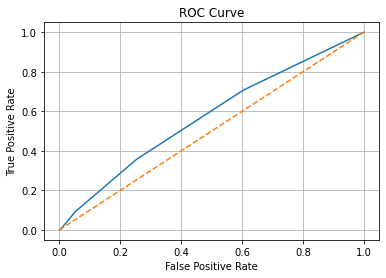

For the XGBClassifier
The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5


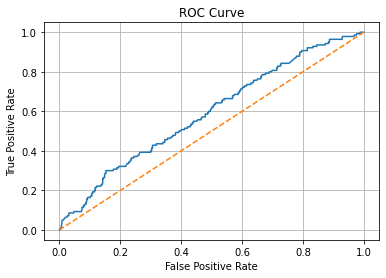

For the RandomForestClassifier
The TEST accuracy is 0.818297331639136
The ROC score for TEST data is 0.5116747626407596


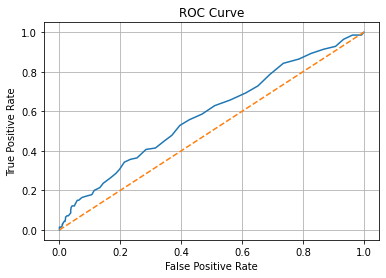

For the GaussianNB
The TEST accuracy is 0.7878017789072427
The ROC score for TEST data is 0.5295098255685582


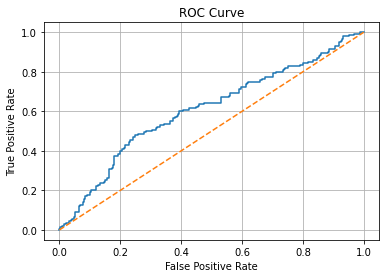

For the LogisticRegression
The TEST accuracy is 0.5641677255400254
The ROC score for TEST data is 0.5558180613822035


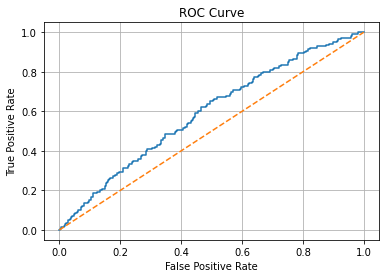

In [445]:
for estimator in estimators:
    predictor(estimator[1])

In [446]:
check_estimators(estimators, X_train,y_train)

DecisionTree
              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72       647
         1.0       0.21      0.44      0.28       140

    accuracy                           0.60       787
   macro avg       0.52      0.54      0.50       787
weighted avg       0.73      0.60      0.64       787

KNN
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       647
         1.0       0.28      0.09      0.14       140

    accuracy                           0.80       787
   macro avg       0.55      0.52      0.51       787
weighted avg       0.73      0.80      0.75       787

XGB
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       647
         1.0       0.00      0.00      0.00       140

    accuracy                           0.82       787
   macro avg       0.41      0.50      0.45       787
weighted avg       0.68      0.82      0.74       787

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

RF
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90       647
         1.0       0.38      0.04      0.07       140

    accuracy                           0.82       787
   macro avg       0.61      0.51      0.48       787
weighted avg       0.75      0.82      0.75       787

NB
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       647
         1.0       0.29      0.13      0.18       140

    accuracy                           0.79       787
   macro avg       0.56      0.53      0.53       787
weighted avg       0.73      0.79      0.75       787

LR
              precision    recall  f1-score   support

         0.0       0.85      0.57      0.68       647
         1.0       0.21      0.54      0.31       140

    accuracy                           0.56       787
   macro avg       0.53      0.56      0.49       787
weighted avg       0.74      0.56      0.62       787



In [447]:
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
check_estimators(estimators, X_resampled,y_resampled)

DecisionTree
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76       647
         1.0       0.22      0.42      0.29       140

    accuracy                           0.64       787
   macro avg       0.53      0.55      0.52       787
weighted avg       0.73      0.64      0.67       787

KNN
              precision    recall  f1-score   support

         0.0       0.85      0.56      0.68       647
         1.0       0.21      0.55      0.31       140

    accuracy                           0.56       787
   macro avg       0.53      0.55      0.49       787
weighted avg       0.74      0.56      0.61       787

XGB
              precision    recall  f1-score   support

         0.0       0.85      0.56      0.67       647
         1.0       0.21      0.54      0.30       140

    accuracy                           0.55       787
   macro avg       0.53      0.55      0.49       787
weighted avg       0.74      0.55      0.61       787

In [448]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
check_estimators(estimators, X_resampled,y_resampled)

DecisionTree
              precision    recall  f1-score   support

         0.0       0.85      0.60      0.70       647
         1.0       0.21      0.50      0.30       140

    accuracy                           0.58       787
   macro avg       0.53      0.55      0.50       787
weighted avg       0.73      0.58      0.63       787

KNN
              precision    recall  f1-score   support

         0.0       0.83      0.59      0.69       647
         1.0       0.20      0.46      0.27       140

    accuracy                           0.56       787
   macro avg       0.51      0.53      0.48       787
weighted avg       0.72      0.56      0.61       787

XGB
              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73       647
         1.0       0.22      0.46      0.30       140

    accuracy                           0.61       787
   macro avg       0.53      0.55      0.51       787
weighted avg       0.74      0.61      0.65       787

Stworzenie nowej funkcji do sprawdzania modeli - pomaga ocenić zbalansowanie wyników:

In [335]:
def model_check(model,y_test,y_pred):
    print(classification_report(y_test, y_pred))

    unique_values, counts = np.unique(y_pred, return_counts=True)
    for value, count in zip(unique_values, counts):
        print(f"Wartość: {value}, Liczba wystąpień: {count}")
    
    predictor(model)

In [336]:
from sklearn.ensemble import StackingClassifier

Wreszcie test Stacking Classifier (na 4 najlepszych estymatorach wedłyg nas):

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


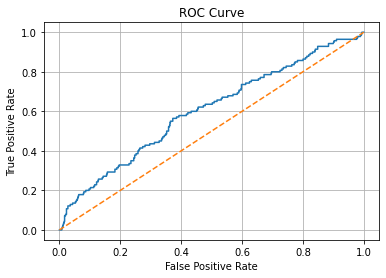

In [450]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model_check(model,y_test,y_pred)

Przy podobnych recall i precision troche lepsze accuracy

In [338]:
from sklearn.ensemble import VotingClassifier,StackingClassifier

Ustawienie tresholdu:

Accuracy with new threshold: 0.7776365946632783
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       647
         1.0       0.31      0.21      0.25       140

    accuracy                           0.78       787
   macro avg       0.58      0.55      0.56       787
weighted avg       0.75      0.78      0.76       787

Wartość: 0, Liczba wystąpień: 694
Wartość: 1, Liczba wystąpień: 93
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


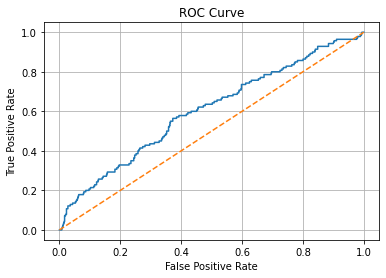

In [453]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.6
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)


O wiele lepsze accuracy, przy pewnym spadku reszty.

In [340]:
estimators

[('DecisionTree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                         min_samples_split=10, random_state=1)),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=1, ...)),
 ('RF', RandomForestClassifier(c

Test voting Classifier

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.6848792884371029
The ROC score for TEST data is 0.5704625745197616


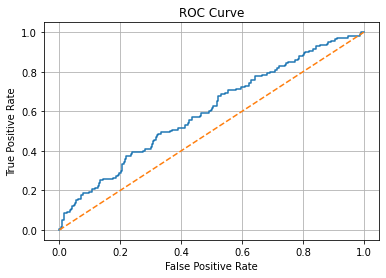

In [341]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.35, 0.1, 0.05 ,0.05, 0.1,0.35]) #trzeba troche poprobowac po prostu
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

In [342]:
estimators2= estimators[:3] + estimators[4:]

estimators

[('DecisionTree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                         min_samples_split=10, random_state=1)),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=1, ...)),
 ('RF', RandomForestClassifier(c

Accuracy with new threshold: 0.7776365946632783
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       647
         1.0       0.31      0.21      0.25       140

    accuracy                           0.78       787
   macro avg       0.58      0.55      0.56       787
weighted avg       0.75      0.78      0.76       787

Wartość: 0, Liczba wystąpień: 694
Wartość: 1, Liczba wystąpień: 93
For the VotingClassifier
The TEST accuracy is 0.7306226175349428
The ROC score for TEST data is 0.5563038198277765


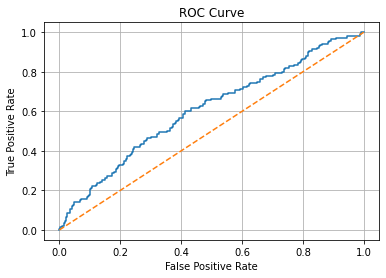

In [343]:
model = VotingClassifier(estimators=estimators2, voting='soft', weights=[0.1, 0.1, 0.1,0.2,0.5]) #trzeba troche poprobowac po prostu
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)

new_threshold = 0.6

# Zastosowanie nowego progu
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

# Obliczenie dokładności dla nowego progu
accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)
y_hat = model.predict(X_test)


model_check(model,y_test,y_pred_new_threshold)

Proba z mniejsza iloscia kolumn:

In [344]:
X_train.drop(["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"], axis =1)
X_train1 = X_train

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.7522236340533672
The ROC score for TEST data is 0.5358578052550231


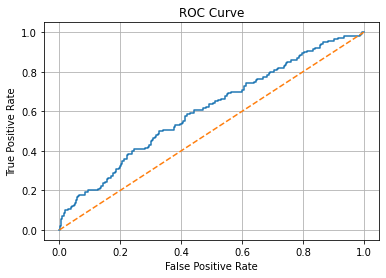

In [457]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.2, 0.1, 0.1 ,0.1, 0.1,0.4]) #trzeba troche poprobowac po prostu
model.fit(X_train1, y_train)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

Accuracy with new threshold: 0.7776365946632783
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       647
         1.0       0.31      0.21      0.25       140

    accuracy                           0.78       787
   macro avg       0.58      0.55      0.56       787
weighted avg       0.75      0.78      0.76       787

Wartość: 0, Liczba wystąpień: 694
Wartość: 1, Liczba wystąpień: 93
For the VotingClassifier
The TEST accuracy is 0.7522236340533672
The ROC score for TEST data is 0.5358578052550231


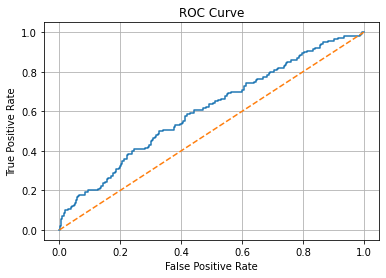

In [458]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.2, 0.1, 0.1 ,0.1, 0.1,0.4]) #trzeba troche poprobowac po prostu
model.fit(X_train1, y_train)

y_hat = model.predict(X_test)

new_threshold = 0.6

# Zastosowanie nowego progu
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

# Obliczenie dokładności dla nowego progu
accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)
y_hat = model.predict(X_test)


model_check(model,y_test,y_pred_new_threshold)


              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.7522236340533672
The ROC score for TEST data is 0.5358578052550231


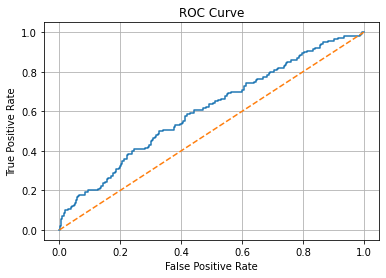

In [459]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.2, 0.1, 0.1 ,0.1, 0.1,0.4]) #trzeba troche poprobowac po prostu
model.fit(X_train1, y_train)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.7306226175349428
The ROC score for TEST data is 0.5563038198277765


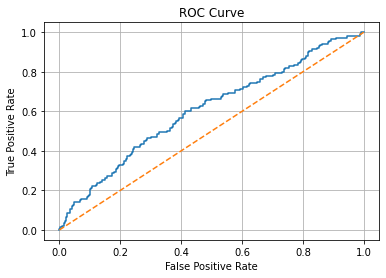

In [460]:
model = VotingClassifier(estimators=estimators2, voting='soft', weights=[0.1, 0.1, 0.1,0.2,0.5]) #trzeba troche poprobowac po prostu
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train1, y_train)
model.fit(X_resampled, y_resampled)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

Ciągle bardzo podobne wyniki

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


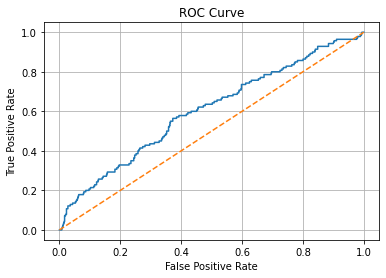

In [461]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train1, y_train)

y_pred = model.predict(X_test)

model_check(model,y_test,y_pred)

Chyba zostaniemy przy Stacking Classifier, który osiąga wyższy Roc score

In [350]:
from sklearn.svm import SVC


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       647
         1.0       0.00      0.00      0.00       140

    accuracy                           0.82       787
   macro avg       0.41      0.50      0.45       787
weighted avg       0.68      0.82      0.74       787

For the StackingClassifier


/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

The TEST accuracy is 0.8221092757306226
The ROC score for TEST data is 0.5


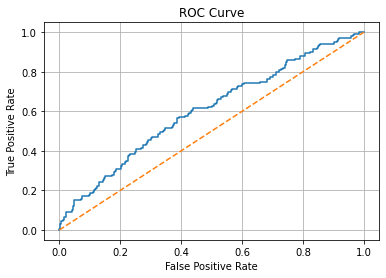

In [464]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(class_weight='balanced', random_state=42)

lr = LogisticRegression()

# Definiowanie modelu Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', svm)],
    final_estimator=lr,
    stack_method='auto',
    passthrough=True,
    cv=5,
    n_jobs=-1
)

# Trenowanie modelu
stacking_classifier.fit(X_train, y_train)

# Predykcja na zbiorze testowym
predictions = stacking_classifier.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, predictions))
predictor(stacking_classifier)


In [352]:
unique_values, counts = np.unique(predictions, return_counts=True)

# Wyświetlenie wyników
for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


In [465]:
from imblearn.over_sampling import SMOTE

random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)

# Technika SMOTE do oversamplingu danych
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

stacking_classifier = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('lr', logistic_regression)],
    final_estimator=LogisticRegression(),  # Klasyfikator meta
    cv=5,
    n_jobs=-1
)

stacking_classifier.fit(X_train_resampled, y_train_resampled)

predictions = stacking_classifier.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       647
         1.0       0.25      0.20      0.22       140

    accuracy                           0.75       787
   macro avg       0.54      0.54      0.54       787
weighted avg       0.73      0.75      0.74       787



dobre wyniki

In [466]:
unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 677
Wartość: 1.0, Liczba wystąpień: 110


In [467]:
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)


stacking_classifier = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('lr', logistic_regression)],
    final_estimator=LogisticRegression(),  # Klasyfikator meta
    cv=5,
    n_jobs=-1
)

stacking_classifier.fit(X_train, y_train)

predictions = stacking_classifier.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       647
         1.0       0.00      0.00      0.00       140

    accuracy                           0.82       787
   macro avg       0.41      0.50      0.45       787
weighted avg       0.68      0.82      0.74       787



/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [356]:
unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 787


In [469]:
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)

oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

stacking_classifier = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('lr', logistic_regression)],
    final_estimator=LogisticRegression(),  # Klasyfikator meta
    cv=5,
    n_jobs=-1
)

stacking_classifier.fit(X_train_resampled, y_train_resampled)

predictions = stacking_classifier.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, predictions))

unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       647
         1.0       0.25      0.20      0.22       140

    accuracy                           0.75       787
   macro avg       0.54      0.54      0.54       787
weighted avg       0.73      0.75      0.74       787

Wartość: 0.0, Liczba wystąpień: 677
Wartość: 1.0, Liczba wystąpień: 110


In [470]:
unique_values, counts = np.unique(predictions, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f"Wartość: {value}, Liczba wystąpień: {count}")

Wartość: 0.0, Liczba wystąpień: 677
Wartość: 1.0, Liczba wystąpień: 110


# NAJLEPSZE EFEKTY

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


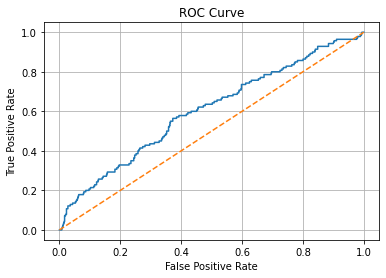

In [471]:
from imblearn.over_sampling import SMOTE

random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

stacking_classifier = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('lr', logistic_regression)],
    final_estimator=LogisticRegression(),  # Klasyfikator meta
    cv=5,
    n_jobs=-1
)

stacking_classifier.fit(X_train_resampled, y_train_resampled)

predictions = stacking_classifier.predict(X_test)

model_check(model,y_test,y_pred)

In [360]:
estimators

[('DecisionTree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                         min_samples_split=10, random_state=1)),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=1, ...)),
 ('RF', RandomForestClassifier(c

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


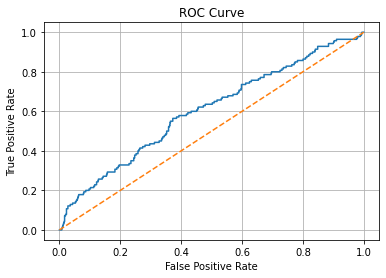

In [472]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model_check(model,y_test,y_pred)

In [362]:
#potencjalny

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


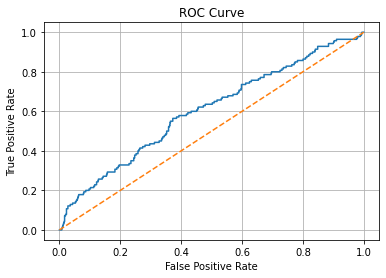

In [473]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train1, y_train)

y_pred = model.predict(X_test)

model_check(model,y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.7522236340533672
The ROC score for TEST data is 0.5358578052550231


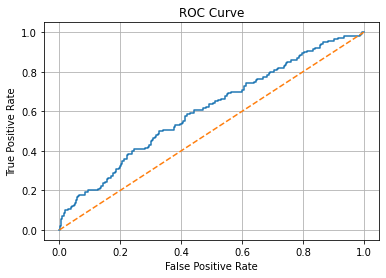

In [474]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.2, 0.1, 0.1 ,0.1, 0.1,0.4]) #trzeba troche poprobowac po prostu
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the VotingClassifier
The TEST accuracy is 0.6848792884371029
The ROC score for TEST data is 0.5704625745197616


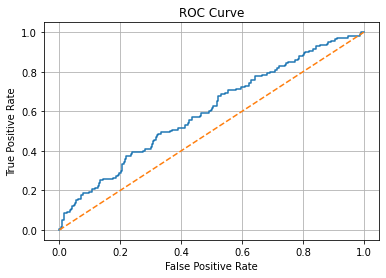

In [475]:
model = VotingClassifier(estimators=estimators, voting='soft', weights=[0.35, 0.1, 0.05 ,0.05, 0.1,0.35]) #trzeba troche poprobowac po prostu
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

model_check(model,y_test,y_pred)

In [366]:
accuracy_score(y_test,y_pred)

0.6124523506988564

Różne tresholdy dla Stacking Classifier, ktory ma najwyzszyc Roc score i dobre średni recall oraz precision

Accuracy with new threshold: 0.7776365946632783
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       647
         1.0       0.31      0.21      0.25       140

    accuracy                           0.78       787
   macro avg       0.58      0.55      0.56       787
weighted avg       0.75      0.78      0.76       787

Wartość: 0, Liczba wystąpień: 694
Wartość: 1, Liczba wystąpień: 93
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


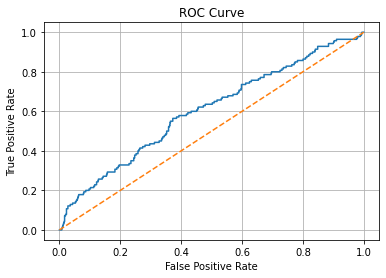

In [476]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.6
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

Accuracy with new threshold: 0.8170266836086404
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       647
         1.0       0.33      0.03      0.05       140

    accuracy                           0.82       787
   macro avg       0.58      0.51      0.48       787
weighted avg       0.74      0.82      0.75       787

Wartość: 0, Liczba wystąpień: 775
Wartość: 1, Liczba wystąpień: 12
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


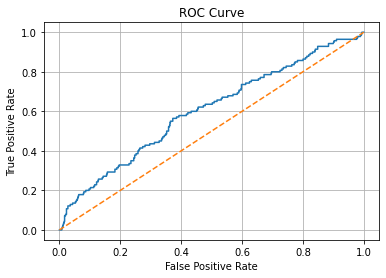

In [477]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.7
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

Accuracy with new threshold: 0.7001270648030495
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       647
         1.0       0.24      0.33      0.28       140

    accuracy                           0.70       787
   macro avg       0.54      0.55      0.55       787
weighted avg       0.74      0.70      0.72       787

Wartość: 0, Liczba wystąpień: 599
Wartość: 1, Liczba wystąpień: 188
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


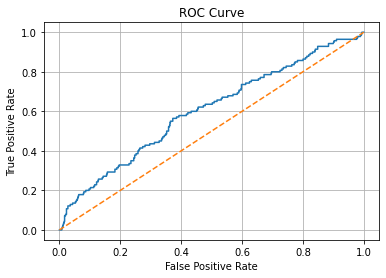

In [478]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.55
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

Accuracy with new threshold: 0.7344345616264295
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       647
         1.0       0.27      0.29      0.28       140

    accuracy                           0.73       787
   macro avg       0.56      0.56      0.56       787
weighted avg       0.74      0.73      0.74       787

Wartość: 0, Liczba wystąpień: 636
Wartość: 1, Liczba wystąpień: 151
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


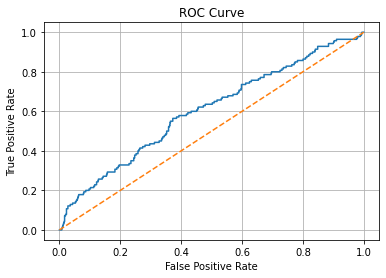

In [370]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.57
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

Accuracy with new threshold: 0.7522236340533672
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       647
         1.0       0.28      0.26      0.27       140

    accuracy                           0.75       787
   macro avg       0.56      0.56      0.56       787
weighted avg       0.74      0.75      0.75       787

Wartość: 0, Liczba wystąpień: 660
Wartość: 1, Liczba wystąpień: 127
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


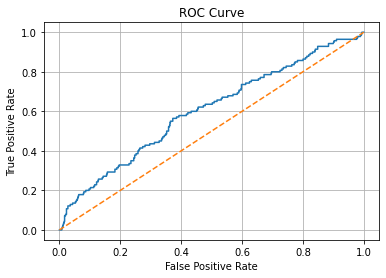

In [479]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.58
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

In [372]:
from imblearn.over_sampling import SMOTE

random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
logistic_regression = LogisticRegression(class_weight='balanced', random_state=42)

# Technika SMOTE do oversamplingu danych
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

stacking_classifier = StackingClassifier(
    estimators=[('rf', random_forest), ('gb', gradient_boosting), ('lr', logistic_regression)],
    final_estimator=LogisticRegression(),  # Klasyfikator meta
    cv=5,
    n_jobs=-1
)

stacking_classifier.fit(X_train_resampled, y_train_resampled)

predictions = stacking_classifier.predict(X_test)

# Ocena modelu
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       647
         1.0       0.25      0.20      0.22       140

    accuracy                           0.75       787
   macro avg       0.54      0.54      0.54       787
weighted avg       0.73      0.75      0.74       787



Accuracy with new threshold: 0.7814485387547649
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       647
         1.0       0.28      0.15      0.20       140

    accuracy                           0.78       787
   macro avg       0.56      0.53      0.53       787
weighted avg       0.74      0.78      0.75       787

Wartość: 0, Liczba wystąpień: 713
Wartość: 1, Liczba wystąpień: 74
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


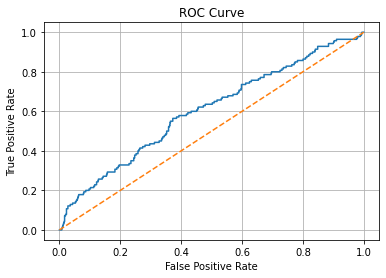

In [373]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.58
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

# FINAL MODEL - stacking classifier z thresholdem na 0,58 bez smote

In [480]:
estimators

[('DecisionTree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                         min_samples_split=10, random_state=1)),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=1, ...)),
 ('RF', RandomForestClassifier(c

Accuracy with new threshold: 0.7522236340533672
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       647
         1.0       0.28      0.26      0.27       140

    accuracy                           0.75       787
   macro avg       0.56      0.56      0.56       787
weighted avg       0.74      0.75      0.75       787

Wartość: 0, Liczba wystąpień: 660
Wartość: 1, Liczba wystąpień: 127
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


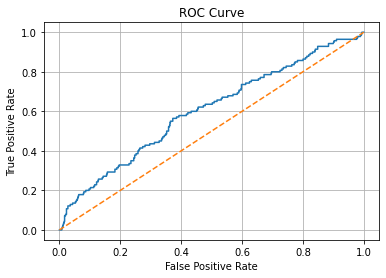

In [508]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.58
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)

### Nieudana próba kroswalidacji

Podejscie z probą polepszenia każdego z estymatorów używanych w Stacking Classifier

In [484]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import metrics


scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
scores

array([0.54464286, 0.43362832, 0.57142857, 0.51785714, 0.59821429])

In [377]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_validate(model, X, y, cv=cv, scoring = ['recall', 'precision'])

{'fit_time': array([4.66187811, 4.62012172, 4.54660797, 4.68134594, 4.60136485]),
 'score_time': array([0.03791499, 0.04051614, 0.03755903, 0.03760791, 0.03781414]),
 'test_recall': array([0.58108108, 0.50952381, 0.52777778, 0.56074766, 0.56565657]),
 'test_precision': array([0.25244618, 0.25659472, 0.24836601, 0.2739726 , 0.23236515])}

In [378]:
scores = cross_validate(model, X_train, y_train, cv=8, scoring = ['recall', 'precision'])
scores

{'fit_time': array([4.76435494, 5.02683091, 4.7222271 , 5.10128212, 4.66238713,
        4.75447989, 4.78295112, 5.23131704]),
 'score_time': array([0.02289009, 0.02378392, 0.02448678, 0.02317095, 0.02294588,
        0.02154803, 0.02165198, 0.02155685]),
 'test_recall': array([0.6       , 0.54285714, 0.42253521, 0.62857143, 0.57142857,
        0.51428571, 0.57142857, 0.61428571]),
 'test_precision': array([0.26582278, 0.25503356, 0.22556391, 0.26190476, 0.23952096,
        0.24      , 0.2484472 , 0.27388535])}

In [488]:
from sklearn.model_selection import GridSearchCV

In [491]:
DecisionTree = estimators[0][1]
DecisionTree.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = tree.predict(X_test)

# Wydruk raportu klasyfikacji
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.36      0.51       647
         1.0       0.20      0.74      0.32       140

    accuracy                           0.43       787
   macro avg       0.53      0.55      0.41       787
weighted avg       0.75      0.43      0.48       787



In [492]:
max_depth=[1,2,3,4, 5, 6,7]
criterion=["gini","entropy","log_loss"]
ccp_alpha=[0, 0.1]
param_grid = dict(max_depth=max_depth, criterion=criterion, ccp_alpha=ccp_alpha)

In [493]:
grid = GridSearchCV(estimator=DecisionTree, param_grid=param_grid, cv = 3, n_jobs=-1, scoring=['accuracy','precision', 'recall'], refit = False)

grid_result = grid.fit(X_train, y_train)

# Wyświetlenie parametrów dla których każdy z wyników był obliczony
print("Parametry dla każdego z wyników:")
for params,accuracy, precision, recall in zip(grid_result.cv_results_['params'],grid_result.cv_results_['mean_test_accuracy'], grid_result.cv_results_['mean_test_precision'], grid_result.cv_results_['mean_test_recall']):
    print("Parametry:", params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()

/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michalwietecki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

Parametry dla każdego z wyników:
Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 1}
Accuracy: 0.5726088338099777
Precision: 0.22965788505863696
Recall: 0.5935828877005348

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 2}
Accuracy: 0.6584048299968224
Precision: 0.25476926992664867
Recall: 0.483065953654189

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 3}
Accuracy: 0.6367969494756912
Precision: 0.2412975255254477
Recall: 0.46702317290552586

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 4}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5}
Accuracy: 0.5856371147124245
Precision: 0.21437750930669322
Recall: 0.49732620320855614

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 6}
Accuracy: 0.6043851286939943
Precision: 0.22145264624172645
Recall: 0.4937611408199644

Parametry: {'ccp_alpha': 0, 'criterion': 'gini', 

NAJLEPSZE DLA MAX_DEPTH =4 LUB =7, ccp_alpha inne niz 0 słabe, ZNAJDZMY INNE PARAMETRY

In [494]:
max_depth=[4,7]
criterion=["gini","entropy","log_loss"]
ccp_alpha=[0]
class_weight=['balanced']
min_samples_split = [4,7,10,15]
param_grid = dict(max_depth=max_depth,min_samples_split=min_samples_split, class_weight=class_weight,criterion=criterion, ccp_alpha=ccp_alpha)

In [495]:
grid = GridSearchCV(estimator=DecisionTree, param_grid=param_grid, cv = 3, n_jobs=-1, scoring=['accuracy','precision', 'recall'], refit = False)

grid_result = grid.fit(X_train, y_train)

# Wyświetlenie parametrów dla których każdy z wyników był obliczony
print("Parametry dla każdego z wyników:")
for params,accuracy, precision, recall in zip(grid_result.cv_results_['params'],grid_result.cv_results_['mean_test_accuracy'], grid_result.cv_results_['mean_test_precision'], grid_result.cv_results_['mean_test_recall']):
    print("Parametry:", params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()
    

Parametry dla każdego z wyników:
Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 15}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4}
Accuracy: 0.5869081665077851

jednak najlepszy depth = 4

In [496]:
max_depth=[4]
criterion=["gini","entropy","log_loss"]
ccp_alpha=[0]
class_weight=['balanced']
min_samples_split = [4,7,10,15]
param_grid = dict(max_depth=max_depth,min_samples_split=min_samples_split, class_weight=class_weight,criterion=criterion, ccp_alpha=ccp_alpha)

In [497]:
grid = GridSearchCV(estimator=DecisionTree, param_grid=param_grid, cv = 3, n_jobs=-1, scoring=['accuracy','precision', 'recall'], refit = False)

grid_result = grid.fit(X_train, y_train)

# Wyświetlenie parametrów dla których każdy z wyników był obliczony
print("Parametry dla każdego z wyników:")
for params,accuracy, precision, recall in zip(grid_result.cv_results_['params'],grid_result.cv_results_['mean_test_accuracy'], grid_result.cv_results_['mean_test_precision'], grid_result.cv_results_['mean_test_recall']):
    print("Parametry:", params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()

Parametry dla każdego z wyników:
Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 10}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 15}
Accuracy: 0.6091515729265968
Precision: 0.2274374805148738
Recall: 0.49910873440285203

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}
Accuracy: 0.6174134095964

gini jednak gorszy, dwa pozostale rowne, wezmy entropy

In [498]:
max_depth=[4]
criterion=["entropy"]
ccp_alpha=[0]
class_weight=['balanced']
min_samples_split = [4,7,10,15]
param_grid = dict(max_depth=max_depth,min_samples_split=min_samples_split, class_weight=class_weight,criterion=criterion, ccp_alpha=ccp_alpha)

In [499]:
grid = GridSearchCV(estimator=DecisionTree, param_grid=param_grid, cv = 3, n_jobs=-1, scoring=['accuracy','precision', 'recall'], refit = False)

grid_result = grid.fit(X_train, y_train)

# Wyświetlenie parametrów dla których każdy z wyników był obliczony
print("Parametry dla każdego z wyników:")
for params,accuracy, precision, recall in zip(grid_result.cv_results_['params'],grid_result.cv_results_['mean_test_accuracy'], grid_result.cv_results_['mean_test_precision'], grid_result.cv_results_['mean_test_recall']):
    print("Parametry:", params)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print()

Parametry dla każdego z wyników:
Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 4}
Accuracy: 0.6174134095964411
Precision: 0.23355066831734075
Recall: 0.49732620320855614

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 7}
Accuracy: 0.6174134095964411
Precision: 0.23355066831734075
Recall: 0.49732620320855614

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 10}
Accuracy: 0.6174134095964411
Precision: 0.23355066831734075
Recall: 0.49732620320855614

Parametry: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 15}
Accuracy: 0.6174134095964411
Precision: 0.23355066831734075
Recall: 0.49732620320855614



wyniki takie same praktycznie, wezmy min_samples_split = 10, sprawdzmy czy wgl lepszy od tamtego:

              precision    recall  f1-score   support

         0.0       0.85      0.53      0.65       647
         1.0       0.21      0.57      0.30       140

    accuracy                           0.53       787
   macro avg       0.53      0.55      0.48       787
weighted avg       0.74      0.53      0.59       787

Wartość: 0.0, Liczba wystąpień: 400
Wartość: 1.0, Liczba wystąpień: 387
For the DecisionTreeClassifier
The TEST accuracy is 0.5336721728081322
The ROC score for TEST data is 0.5484654449105762


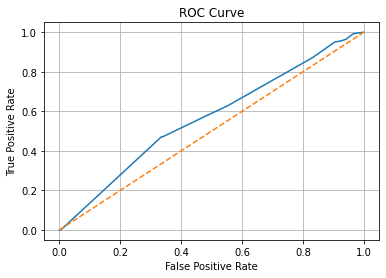

In [511]:
test_dt = DecisionTreeClassifier(ccp_alpha= 0, class_weight= 'balanced', criterion= 'entropy', max_depth= 4, min_samples_split= 10,random_state=1)
test_dt.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = test_dt.predict(X_test)

# Wydruk raportu klasyfikacji
model_check(test_dt,y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.84      0.63      0.72       647
         1.0       0.21      0.44      0.28       140

    accuracy                           0.60       787
   macro avg       0.52      0.54      0.50       787
weighted avg       0.73      0.60      0.64       787

Wartość: 0.0, Liczba wystąpień: 488
Wartość: 1.0, Liczba wystąpień: 299
For the DecisionTreeClassifier
The TEST accuracy is 0.5997458703939009
The ROC score for TEST data is 0.5382755575182159


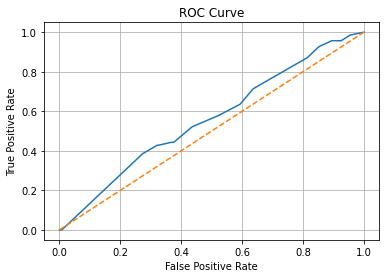

In [514]:
DecisionTree.fit(X_train, y_train)

# Predykcja na zbiorze testowym
y_pred = DecisionTree.predict(X_test)

# Wydruk raportu klasyfikacji
model_check(DecisionTree,y_test,y_pred)

model gorszy od poprzedniego(chyba nie ma sensu tak testowac)

Podejscie 2: Kroswalidacja na calym stacking Classifier

zainstalowanie potrzebnych pakietow do Stacking Classifier przystosowanym do Kroswalidacji

In [517]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [518]:
classifiers = [
    (DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_split=10, random_state=1)),
    (KNeighborsClassifier()),
    (XGBClassifier(base_score=None, booster='gbtree', learning_rate=0.01, max_depth=3, n_estimators=200, random_state=1)),
    ( RandomForestClassifier(class_weight='balanced', random_state=42))
]

stworzenie drugiego identycznego modelu tylko za pomoca StackingCVClassifier

In [520]:
from mlxtend.classifier import StackingCVClassifier


Modele bez tresholdu:

              precision    recall  f1-score   support

         0.0       0.84      0.61      0.71       647
         1.0       0.21      0.47      0.29       140

    accuracy                           0.58       787
   macro avg       0.52      0.54      0.50       787
weighted avg       0.73      0.58      0.63       787

Wartość: 0.0, Liczba wystąpień: 468
Wartość: 1.0, Liczba wystąpień: 319
For the StackingCVClassifier
The TEST accuracy is 0.5997458703939009
The ROC score for TEST data is 0.5382755575182159


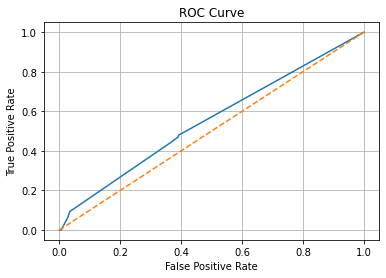

In [523]:
model_cv = StackingCVClassifier(classifiers=classifiers, meta_classifier=LogisticRegression(class_weight='balanced', max_iter=1000), cv=5)

model_cv.fit(X_train, y_train)

y_pred = model_cv.predict(X_test)

# y_pred_proba = model_cv.predict_proba(X_test)

# new_threshold = 0.5
# y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

# accuracy = accuracy_score(y_test, y_pred_new_threshold)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# model_check(model_cv,y_test,y_pred_new_threshold)
model_check(model_cv,y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


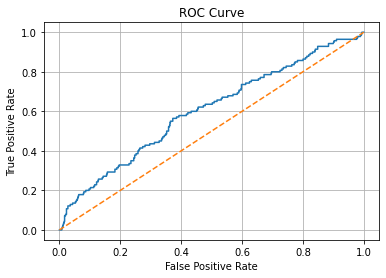

In [524]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# y_pred_proba = model.predict_proba(X_test)

# new_threshold = 0.58
# y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy with new threshold:", accuracy)

model_check(model,y_test,y_pred)

modele z tresholdami:

Accuracy treshhold: 0.5844980940279543
recall treshhold: 0.4714285714285714
precision treshhold: 0.20689655172413793
              precision    recall  f1-score   support

         0.0       0.84      0.61      0.71       647
         1.0       0.21      0.47      0.29       140

    accuracy                           0.58       787
   macro avg       0.52      0.54      0.50       787
weighted avg       0.73      0.58      0.63       787

Wartość: 0.0, Liczba wystąpień: 468
Wartość: 1.0, Liczba wystąpień: 319
For the StackingCVClassifier
The TEST accuracy is 0.5997458703939009
The ROC score for TEST data is 0.5382755575182159


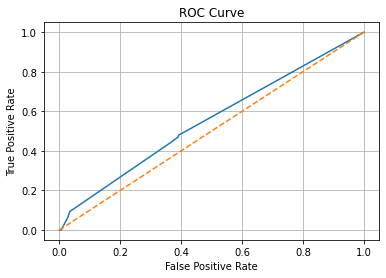

In [525]:
model_cv = StackingCVClassifier(classifiers=classifiers, meta_classifier=LogisticRegression(class_weight='balanced', max_iter=1000), cv=5)

model_cv.fit(X_train, y_train)

y_pred = model_cv.predict(X_test)

y_pred_proba = model_cv.predict_proba(X_test)

new_threshold = 0.5
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)

print("Accuracy treshhold:", accuracy)
print("recall treshhold:", recall)
print("precision treshhold:", precision)

# model_check(model_cv,y_test,y_pred_new_threshold)
model_check(model_cv,y_test,y_pred)

Accuracy with new threshold: 0.7522236340533672
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       647
         1.0       0.24      0.56      0.34       140

    accuracy                           0.61       787
   macro avg       0.56      0.59      0.53       787
weighted avg       0.76      0.61      0.66       787

Wartość: 0.0, Liczba wystąpień: 464
Wartość: 1.0, Liczba wystąpień: 323
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


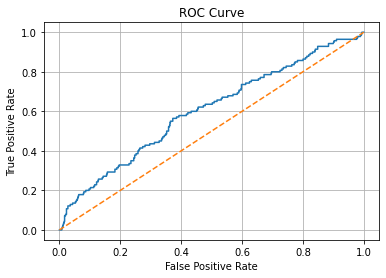

In [526]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.58
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy)

model_check(model,y_test,y_pred)

In [529]:
params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta_classifier__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=model_cv, 
                    param_grid=params, 
                    cv=5,
                    refit=False)
grid.fit(X, y)
cv_keys = ('params','accuracy_test_score',"recall_test_score", "precision_test_score")

for params,accuracy,recall, precision in zip(grid_result.cv_results_['params'],grid_result.cv_results_['mean_test_accuracy'], grid_result.cv_results_['mean_test_precision'], grid_result.cv_results_['mean_test_recall']):
    print(grid.cv_results_[cv_keys[0]][params])
    print('siema')

# for r, _ in enumerate(grid.cv_results_['params'],):
#     print('siema')
#     print("%0.3f +/- %0.2f %r"
#           % (grid.cv_results_[cv_keys[0]][r],
#              grid.cv_results_[cv_keys[1]][r] / 2.0,
#              grid.cv_results_[cv_keys[2]][r]))

KeyboardInterrupt: 

po dłuższej walce nie działa, albo błędy albo nic się nie wypisuje, na prawde duzo zostalo wyprobowane...:(

# Final Final model - stacking classifier z thresholdem na 0,58 bez smote

In [530]:
estimators[0:4]

[('DecisionTree',
  DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                         min_samples_split=10, random_state=1)),
 ('KNN', KNeighborsClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=3, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=200, n_jobs=None,
                num_parallel_tree=None, random_state=1, ...)),
 ('RF', RandomForestClassifier(c

Accuracy with new threshold: 0.7522236340533672
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       647
         1.0       0.28      0.26      0.27       140

    accuracy                           0.75       787
   macro avg       0.56      0.56      0.56       787
weighted avg       0.74      0.75      0.75       787

Wartość: 0, Liczba wystąpień: 660
Wartość: 1, Liczba wystąpień: 127
For the StackingClassifier
The TEST accuracy is 0.6124523506988564
The ROC score for TEST data is 0.5935802605431663


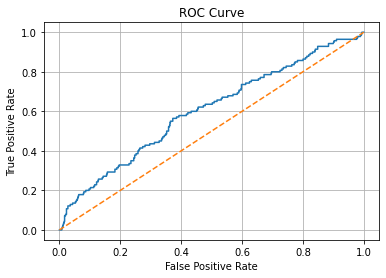

In [531]:
model = StackingClassifier(estimators=estimators[0:4], final_estimator=estimators[5][1], cv=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

new_threshold = 0.58
y_pred_new_threshold = (y_pred_proba[:, 1] >= new_threshold).astype(int)

accuracy_new_threshold = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy with new threshold:", accuracy_new_threshold)

model_check(model,y_test,y_pred_new_threshold)